In [37]:
# 단어가방(BOW: Bag of Words)

import warnings
warnings.filterwarnings("ignore")

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# !pip install koreanize-matplotlib
# 한글 포트 설정

In [40]:
import koreanize_matplotlib

# retina display
%config InlineBackend.figure_format = 'retina'

pd.Series([1,3,5,-7,9,10])

0     1
1     3
2     5
3    -7
4     9
5    10
dtype: int64

<Axes: title={'center': '한글'}>

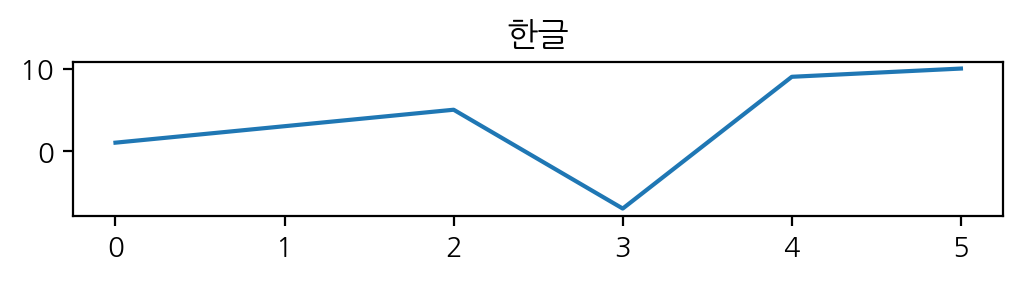

In [41]:
pd.Series([1,3,5,-7,9,10]).plot(title='한글', figsize=(6,1))

In [42]:
# BOW 단어가방 모형 만들기

# 먼저, 데이터를 corpus(말뭉치) 담아 둠

corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "택시 승강장 문의입니다."]

corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '택시 승강장 문의입니다.']

In [43]:
# sklearn.feature_extraction.text 에서 CountVectorizer() 활용, BOW 생성

from sklearn.feature_extraction.text import CountVectorizer


cvect = CountVectorizer()
cvect.fit(corpus)

CountVectorizer()

In [44]:
dtm = cvect.transform(corpus)
dtm
# 문서 >> 문서-용어 행렬(document-term matrix) 변환

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [45]:
cvect.fit_transform(corpus)

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [46]:
# 단어사전 확인
# >> {"word": "index"} 형태
cvect.vocabulary_

{'코로나': 7,
 '거리두기와': 0,
 '상생지원금': 2,
 '문의입니다': 1,
 '지하철': 6,
 '운행시간과': 5,
 '요금': 4,
 '승강장': 3,
 '택시': 8}

In [47]:
# get_feature_names_out()

cvect.get_feature_names_out()

array(['거리두기와', '문의입니다', '상생지원금', '승강장', '요금', '운행시간과', '지하철', '코로나',
       '택시'], dtype=object)

In [48]:
vocab = cvect.get_feature_names_out()
vocab

array(['거리두기와', '문의입니다', '상생지원금', '승강장', '요금', '운행시간과', '지하철', '코로나',
       '택시'], dtype=object)

In [49]:
dtm.toarray() # dtm >> array(배열)

array([[1, 1, 1, 0, 0, 0, 0, 2, 0],
       [0, 1, 0, 0, 1, 1, 2, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 1]])

In [50]:
# document-term matrix >> data frme 만들기(단어 빈도 확인)

pd.DataFrame(dtm.toarray(), columns=vocab)

,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,1,1,1,0,0,0,0,2,0
1,0,1,0,0,1,1,2,0,0
2,0,1,0,1,0,0,1,0,0
3,0,1,0,1,0,0,0,0,1


In [51]:
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm
# 여기서 0 의미는?
# >>전체 문서에는 등장, 해당 문서에는 등장하지 않은 단어

,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,1,1,1,0,0,0,0,2,0
1,0,1,0,0,1,1,2,0,0
2,0,1,0,1,0,0,1,0,0
3,0,1,0,1,0,0,0,0,1


In [52]:
corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '택시 승강장 문의입니다.']

In [53]:
df_dtm.sum()

거리두기와    1
문의입니다    4
상생지원금    1
승강장      2
요금       1
운행시간과    1
지하철      3
코로나      2
택시       1
dtype: int64

In [54]:
df_dtm.sum().to_frame().T

,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,1,4,1,2,1,1,3,2,1


In [55]:
# n-gram
# 토큰을 몇 개 사용할 것인지 구분
# 지정한 n개 숫자 만큼 토큰을 묶어서 사용
# (1,1) 1개 토큰(default) , (2,3) 2~3개 토큰 사용

CountVectorizer(ngram_range=(1,2))
# ngram_range(1,2) : 1<=n<=2

CountVectorizer(ngram_range=(1, 2))

In [56]:
cvect = CountVectorizer(ngram_range=(1,2))
dtm =cvect.fit_transform(corpus)
dtm

<4x20 sparse matrix of type '<class 'numpy.int64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [57]:
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와,거리두기와 코로나,문의입니다,상생지원금,상생지원금 문의입니다,승강장,승강장 문의입니다,요금,요금 문의입니다,운행시간과,운행시간과 지하철,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기와,코로나 상생지원금,택시,택시 승강장
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0
1,0,0,1,0,0,0,0,1,1,1,1,2,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1


In [58]:
df_dtm.sum().to_frame().T

,거리두기와,거리두기와 코로나,문의입니다,상생지원금,상생지원금 문의입니다,승강장,승강장 문의입니다,요금,요금 문의입니다,운행시간과,운행시간과 지하철,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기와,코로나 상생지원금,택시,택시 승강장
0,1,1,4,1,1,2,2,1,1,1,1,3,1,1,1,2,1,1,1,1


In [59]:
# min_df, max_df
# (default) 기본값 = 1
# min_df : 문서 빈도가 지정한 임계값(threshold) 보다 낮은 용어 무시
# min_df = 0.60 >> 적어도 문서의 60%에 용어가 나타나야 함
# max_df : 어휘 작성시 주어진 임계값(threshold) 보다 문서 빈도가 높은 용어 무시
# >> 빈번하게 등장하는 불용어 제거하기 위함
# 예) 코로나 관련 기사 : '코로나' 빈번

cvect = CountVectorizer(ngram_range=(1,3), min_df=0.2, max_df=5)
dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names_out()

df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와,거리두기와 코로나,거리두기와 코로나 상생지원금,문의입니다,상생지원금,상생지원금 문의입니다,승강장,승강장 문의입니다,요금,요금 문의입니다,...,지하철 운행시간과,지하철 운행시간과 지하철,코로나,코로나 거리두기와,코로나 거리두기와 코로나,코로나 상생지원금,코로나 상생지원금 문의입니다,택시,택시 승강장,택시 승강장 문의입니다
0,1,1,1,1,1,1,0,0,0,0,...,0,0,2,1,1,1,1,0,0,0
1,0,0,0,1,0,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,1


In [60]:
# max_features

# (default) None
# vectorizer 학습할 기능(어휘) 양 제한
# corpus 중 빈도수가 가장 높은 순으로 해당 개수만큼 추출

cvect = CountVectorizer(ngram_range=(1,3), min_df=1, max_df=1.0,
                max_features=10)

dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,문의입니다,승강장,승강장 문의입니다,지하철,코로나,코로나 거리두기와,코로나 거리두기와 코로나,코로나 상생지원금,코로나 상생지원금 문의입니다,택시
0,1,0,0,0,2,1,1,1,1,0
1,1,0,0,2,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1


불용어 stopwords

In [62]:
stop_words = ["코로나","문의입니다"]

cvect = CountVectorizer(ngram_range=(1,3), min_df=1, max_df=1.0,
                 max_features=20, stop_words=stop_words)

dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names_out()

df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와,거리두기와 상생지원금,상생지원금,승강장,요금,운행시간과,운행시간과 지하철,운행시간과 지하철 요금,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,지하철 운행시간과 지하철,택시,택시 승강장
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,2,0,1,1,1,0,0
2,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1


analyzer

In [64]:
# analyzer
# (default) word
# 종류 : word, char, char_wb

# analyzer='char' , ngram_range(2,3)  2<=n<=3

cvect = CountVectorizer(analyzer='char',
                ngram_range=(1,5), min_df=2, max_df=1.0,
                max_features=30, stop_words=stop_words)

dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names_out()

df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,,문,문의,문의입,문의입니,.,니,니다,니다.,다,...,의입니다.,입,입니,입니다,입니다.,지,철,철,하,하철
0,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
1,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,2,2,2,2
2,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0


In [65]:
# TF-IDF (가중치 존재)

# TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer()
tfidfvect.fit(corpus)
dtm = tfidfvect.transform(corpus)
dtm

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [66]:
dtm = tfidfvect.fit_transform(corpus)
dtm

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [67]:
dtm.toarray()

array([[0.39928771, 0.20836489, 0.39928771, 0.        , 0.        ,
        0.        , 0.        , 0.79857543, 0.        ],
       [0.        , 0.23921859, 0.        , 0.        , 0.45841237,
        0.45841237, 0.72283516, 0.        , 0.        ],
       [0.        , 0.42389674, 0.        , 0.64043405, 0.        ,
        0.        , 0.64043405, 0.        , 0.        ],
       [0.        , 0.37919167, 0.        , 0.5728925 , 0.        ,
        0.        , 0.        , 0.        , 0.72664149]])

In [68]:
vocab = tfidfvect.get_feature_names_out()
vocab

array(['거리두기와', '문의입니다', '상생지원금', '승강장', '요금', '운행시간과', '지하철', '코로나',
       '택시'], dtype=object)

In [69]:
pd.DataFrame(dtm.toarray(), columns=vocab)

,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,0.399288,0.208365,0.399288,0.000000,0.000000,0.000000,0.000000,0.798575,0.000000
1,0.000000,0.239219,0.000000,0.000000,0.458412,0.458412,0.722835,0.000000,0.000000
2,0.000000,0.423897,0.000000,0.640434,0.000000,0.000000,0.640434,0.000000,0.000000
3,0.000000,0.379192,0.000000,0.572892,0.000000,0.000000,0.000000,0.000000,0.726641


In [71]:
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
display(df_dtm.style.background_gradient())
# display통해 변환 결과 확인

,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,0.399288,0.208365,0.399288,0.000000,0.000000,0.000000,0.000000,0.798575,0.000000
1,0.000000,0.239219,0.000000,0.000000,0.458412,0.458412,0.722835,0.000000,0.000000
2,0.000000,0.423897,0.000000,0.640434,0.000000,0.000000,0.640434,0.000000,0.000000
3,0.000000,0.379192,0.000000,0.572892,0.000000,0.000000,0.000000,0.000000,0.726641


In [73]:
# idf
# 하나의 문서에만 나타나는 토큰은 idf 가중치가 높게 나옴 (예) 원자, 핵폭탄
# 적게 나타난 토큰이나, 모든 문서에서 존재하는 토큰은 idf 가 낮다.

idf = tfidfvect.idf_
idf

array([1.91629073, 1.        , 1.91629073, 1.51082562, 1.91629073,
       1.91629073, 1.51082562, 1.91629073, 1.91629073])

In [75]:
# 사전 만들기
# 만드는 방법
# dict, zip 사용, feature name하고 idf 값 >> dict()

vocab = tfidfvect.get_feature_names_out()

dict(zip(vocab, idf))

{'거리두기와': 1.916290731874155,
 '문의입니다': 1.0,
 '상생지원금': 1.916290731874155,
 '승강장': 1.5108256237659907,
 '요금': 1.916290731874155,
 '운행시간과': 1.916290731874155,
 '지하철': 1.5108256237659907,
 '코로나': 1.916290731874155,
 '택시': 1.916290731874155}

In [76]:
idf_dict = dict(zip(vocab, idf))
idf_dict

{'거리두기와': 1.916290731874155,
 '문의입니다': 1.0,
 '상생지원금': 1.916290731874155,
 '승강장': 1.5108256237659907,
 '요금': 1.916290731874155,
 '운행시간과': 1.916290731874155,
 '지하철': 1.5108256237659907,
 '코로나': 1.916290731874155,
 '택시': 1.916290731874155}

In [77]:
# idf_dict 시각화

pd.Series(idf_dict)

거리두기와    1.916291
문의입니다    1.000000
상생지원금    1.916291
승강장      1.510826
요금       1.916291
운행시간과    1.916291
지하철      1.510826
코로나      1.916291
택시       1.916291
dtype: float64

<Axes: >

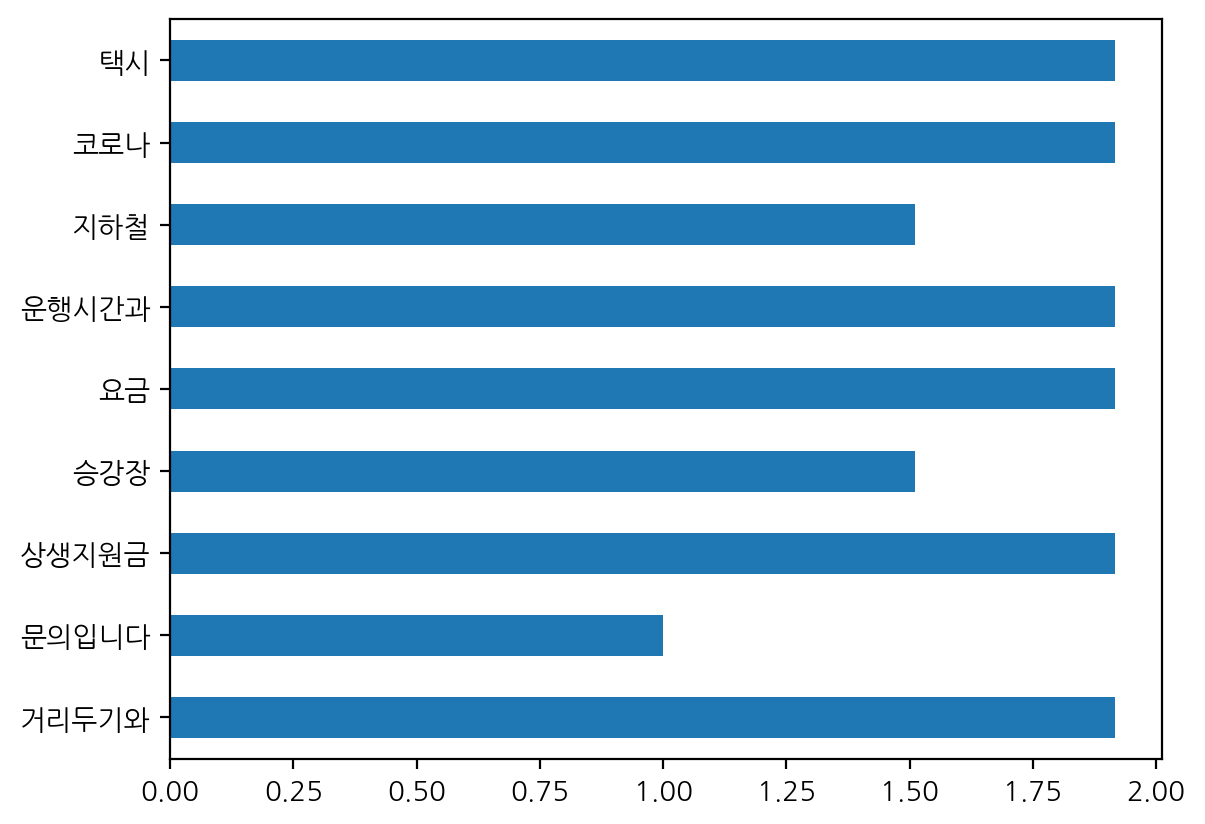

In [81]:
pd.Series(idf_dict).plot.barh()

In [82]:
# 단어
print(vocab)

['거리두기와' '문의입니다' '상생지원금' '승강장' '요금' '운행시간과' '지하철' '코로나' '택시']


In [83]:
# 단어
len(vocab)

9